In [3]:
import os
import sys
from glob import glob
import numpy as np
import pandas as pd
import wfdb
import biosignalsnotebooks as bsnb
from wfdb import processing
from matplotlib import pyplot as plt
from scipy import signal
from biosppy.signals import ecg
np.set_printoptions(threshold=sys.maxsize)


In [4]:
store = '/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/mit-bih-arrhythmia-database-1.0.0/100'
record = wfdb.rdrecord(store, sampto=100)
# wfdb.plot_wfdb(record, title='Record 100 from MIT-BIH Arrhythmia database') 
# display(record.__dict__)

In [5]:
# data, header = bsnb.load_signal("ecg_4000_Hz", get_header=True)

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


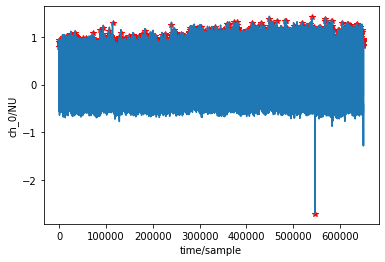

In [6]:
sig, fields = wfdb.rdsamp(store, channels=[0])
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()
wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])

In [7]:
# file_path = glob.glob('./mit-bih-arrhythmia-database-1.0.0/*.atr')
# files = [i[:-4] for i in file_path]
# files.sort()


# file = './mit-bih-arrhythmia-database-1.0.0/100'

# ann_ref = wfdb.rdann(file, 'atr')

# number_of_rpeaks = len(ann_ref.symbol)

# values = np.zeros((48,2))
# classes = ['N','R','L','V','A','E']
# for i in range(len(files)):
#     signals, fields = wfdb.rdsamp(files[i])
#     annotation = wfdb.rdann(files[i], 'atr')
#     for j in classes:
#         ids = np.in1d(annotation.symbol, j)
#         beats = annotation.sample[ids]
#         values[i] = [j,len(beats)]

# print(values)



# n = ['N']
# v = ['V']

# check_normal = np.in1d(ann_ref.symbol, n)
# check_v = np.in1d(ann_ref.symbol, v)

# normal_beats = ann_ref.sample[check_normal]
# v_beats = ann_ref.sample[check_v]

# print(len(check_normal))

# comparitor = processing.compare_annotations(ann_ref.sample[1:], xqrs.qrs_inds, int(0.1 * fields['fs']), sig[:,0])
# comparitor.print_summary()
# comparitor.plot()

In [8]:

def get_data(path):
    file_path = glob(path)
    files = [i[:-4] for i in file_path]
    files.sort()
    return files

## Histogram

(112647,)


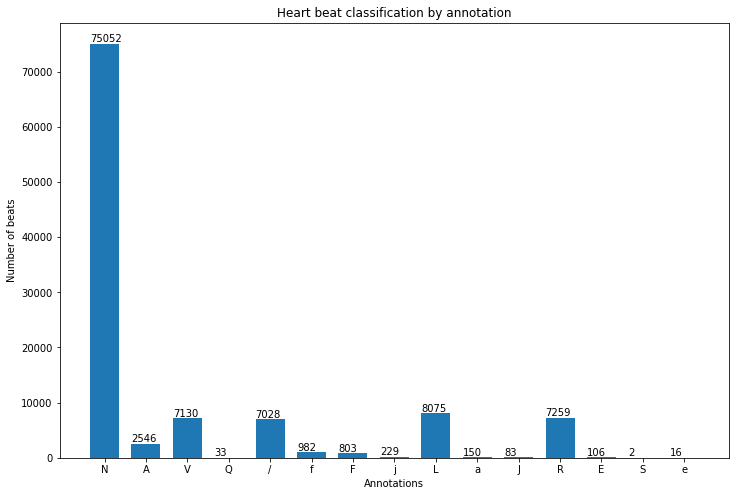

In [9]:

# print(len(get_data()))
path = '/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/mit-bih-arrhythmia-database-1.0.0/*.atr'
file_list = get_data(path)

ann_list = []
for i in range(len(file_list)): #going through each of the 48 files...
    data_file = file_list[i] #one file of the 48
    record = wfdb.rdsamp(data_file)  #returns an array of the sample
    ann_ref = wfdb.rdann(data_file, 'atr') #reading annotations in the file
    ann_list.extend(ann_ref.symbol)
    
ann_array = np.array(ann_list)
print(ann_array.shape)
# annp = wfdb.rdann(file_list[7], 'atr')
# print(len(annp.symbol))
# print(annp.label_store)



actual_beats = ['N','L','R','B','A','a','J','S','V','r',
             'F','e','j','n','E','/','f','Q','?']

ann_dict = {}

for i in ann_array:
    ann_dict[i] = ann_dict.get(i,0)+1

ann_dict = {k:v for k,v in ann_dict.items() if k in actual_beats}


plt.figure(figsize=(12,8))

xlocs, xlabs = plt.xticks()

bars = plt.bar(list(ann_dict.keys()), ann_dict.values(), width=.7)
plt.title("Heart beat classification by annotation")
xlocs = [i for i in ann_dict.keys()]
ylabs = [i for i in ann_dict.values()]

plt.xlabel("Annotations")
plt.ylabel("Number of beats")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 300, yval)

# xlocs = [i/2 for i in range(len(ann_dict.keys()))]
# for i, v in enumerate(ann_dict.values()):
#     plt.text((xlocs[i] - 0.25, v + 0.01, str(v)))

# print(np.array(ann_ref.symbol).shape)
# print(record[1].get('fs'))
# print(record[0].shape)
# print(len(ann_ref.num)) #prints number of annotations (no of beats) 
# # num is the labelled annotation number for each annotation
# print(ann_ref.symbol)

## Visualising the Data per Patient

In [10]:
#Visualising the data
file_index = 0 #0 to 47 files in the database

current_file = file_list[file_index]

record = wfdb.rdsamp(current_file)
ann_ref = wfdb.rdann(current_file, 'atr')



# samp_start = 0
# samp_end = 6500
# samples = samp_end - samp_start
# #picking first record, picking first channel, 
# #going from samp_start to samp_end in that channel
# channel = record[0][samp_start:samp_end, 1]
# #record is coming fromt the FIRST cell using the first file, change it there to see next file
# time = (np.arange(samples, dtype='float')+ samp_start)/record[1].get('fs')

# plt.figure(figsize=(20,10))
# plt.plot(time,channel)


# peak_location=np.logical_and(ann_ref.sample >= samp_start, ann_ref.sample < samp_end)
# #.sample returns a numpy array containing the annotation locations in samples relative to the beginning of the record
# #i.e., where each beat is
# anns = ann_ref.sample[peak_location] - samp_start
# ann_types = np.array(ann_ref.symbol)
# req_ann_types = ann_types[peak_location]
# print(ann_types.shape, req_ann_types.shape)


# ann_time = time[anns]
# plt.plot(ann_time, np.ones_like(ann_time)*channel.max()*1.4,'ro')


# for index, annotation in enumerate(anns):
#     plt.annotate(ann_types[index], xy = (time[annotation], channel.max()*1.1))

    
# plt.xlim([samp_start / record[1].get('fs'), (samp_end/record[1].get('fs'))+1])
# plt.xlabel('offset')
# plt.ylabel(record[1].get('sig_name')[1])
# plt.show()
# q = np.array([[1,2,3,4,5,6],[7,8,9,10,11,12]])
# print(q.shape)
# for i, z in enumerate(q):
#     print(z)

In [13]:


for file in file_list:
    path = file.split('/')
    fn = path[-1]
    record = wfdb.rdsamp(file)
    ecg_val = record[0].T
    ann_ref = wfdb.rdann(file,'atr')

    ann_list = np.array(ann_ref.symbol)
    ann_number = np.zeros_like(ann_list, dtype='float')
    
    for annid, anno in enumerate(ann_list):
        if anno == 'N':
            ann_number[annid] = 1.0
        elif anno == 'L':
            ann_number[annid] = 2.0
        elif anno == 'R':
            ann_number[annid] = 3.0
        elif anno == 'A':
            ann_number[annid] = 4.0
        elif anno == 'V':
            ann_number[annid] = 5.0
        elif anno == 'F':
            ann_number[annid] = 6.0
        elif anno == 'f':
            ann_number[annid] = 7.0
        elif anno == '/':
            ann_number[annid] = 8.0
    all_ann_numbers = np.zeros_like(ecg_val[0], dtype='float')
    all_ann_numbers[ann_ref.sample] = ann_number

    for ch_id, channel in enumerate(ecg_val): #enumerates the 2 channels - so 0 and 1
        channel_name = record[1].get('sig_name')[ch_id]
        print("ECG channel: ", channel_name)
        
        ecg_output = ecg.ecg(signal=channel, sampling_rate=360, show=False)
        rpeaks = np.zeros_like(channel, dtype='float')
        rpeaks[ecg_output['rpeaks']] = 1.0
        

        all_beats = np.array(np.split(channel, ecg_output['rpeaks']))
        print(all_beats.shape)
        remove_beats = [0]
        for i, i_val in enumerate(ecg_output['rpeaks']):
            first = i == 0
            last = i == len(all_beats) - 1
            
            if first or last:
                continue
            
            if i_val < 10:
                from_i = 0
            else:
                from_i = i_val - 10
            to_i = i_val + 10
            anno = all_ann_numbers[from_i:to_i].max()
            
            if anno == 0.0:
                remove_beats = np.append(remove_beats, i)
                continue
            
            all_beats[i] = np.append(all_beats[i], all_beats[i+1][:150])
            
            # standardise the data
            all_beats[i] = (all_beats[i]-np.mean(all_beats[i]))/np.std(all_beats[i])
            
            newsize = int((all_beats[i].size * 150 / 360))
            all_beats[i] = signal.resample(all_beats[i], newsize)
            
            if all_beats[i].size > 187:
                remove_beats = np.append(remove_beats, i)
                continue
            
            zerocount = 187 - all_beats[i].size
            all_beats[i] = np.pad(all_beats[i], (0, zerocount), 'constant', constant_values=(0.0, 0.0))

            
            all_beats[i] = np.append(all_beats[i], anno)

        remove_beats = np.append(remove_beats, len(all_beats)-1)

        all_beats = np.delete(all_beats, remove_beats)
        
        print(all_beats.shape)
        
        savedata = np.array(list(all_beats[:]), dtype=np.float)
        
        outfn = 'data_ecg/'+fn+'_'+channel_name+'.csv'
        print('    Generating ', outfn)
        if not os.path.exists('data_ecg/'):
            os.makedirs('data_ecg/')
        with open(outfn, "wb") as fin:
            np.savetxt(fin, savedata, delimiter=",", fmt='%f')
            
    

ECG channel:  MLII


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


(2273,)
(1965,)
    Generating  data_ecg/100_MLII.csv
ECG channel:  V5
(2270,)
(1966,)
    Generating  data_ecg/100_V5.csv
ECG channel:  MLII
(1867,)
(96,)
    Generating  data_ecg/101_MLII.csv
ECG channel:  V1
(1880,)
(168,)
    Generating  data_ecg/101_V1.csv
ECG channel:  V5
(2188,)
(1374,)
    Generating  data_ecg/102_V5.csv
ECG channel:  V2


KeyboardInterrupt: 

## Visualise the heartbeats

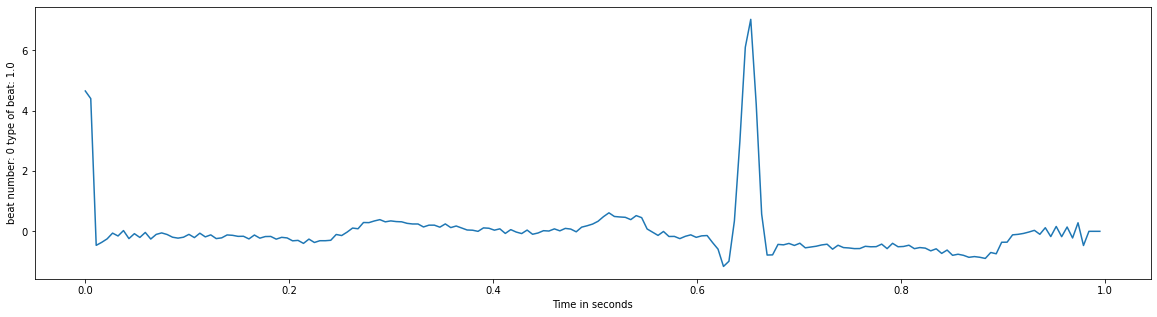

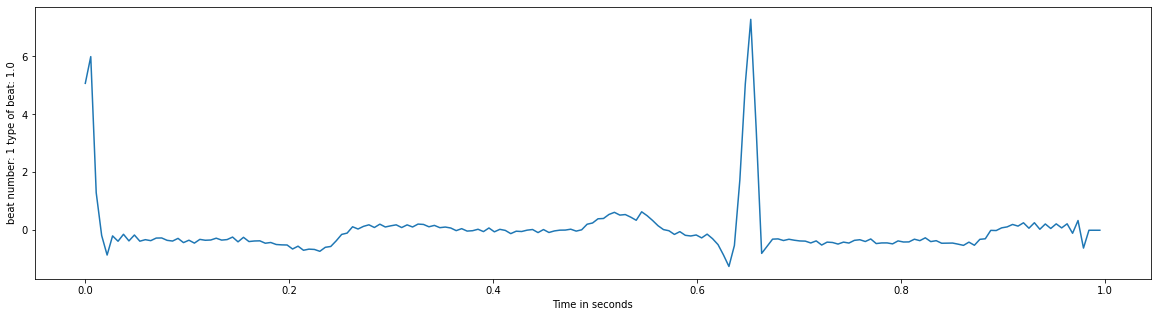

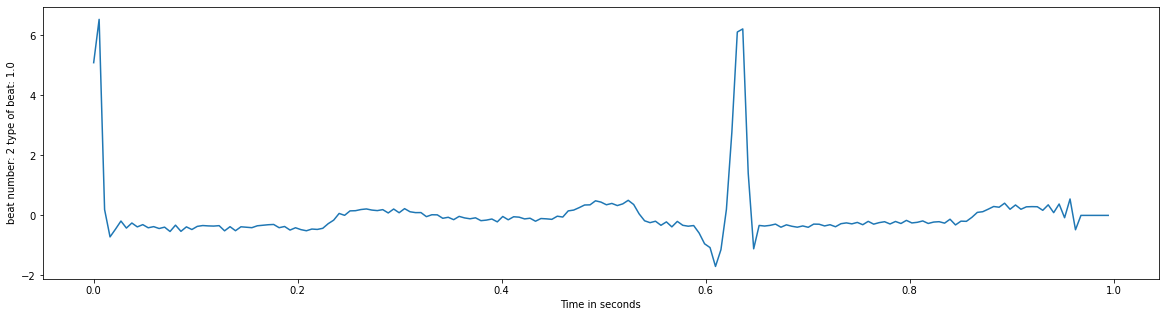

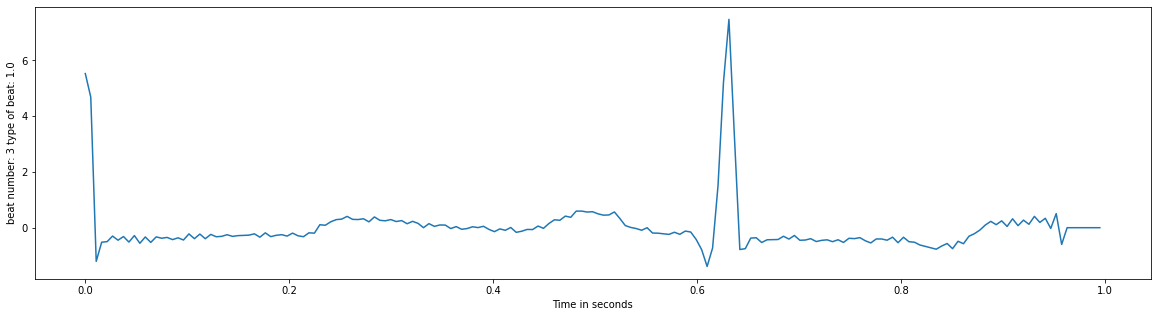

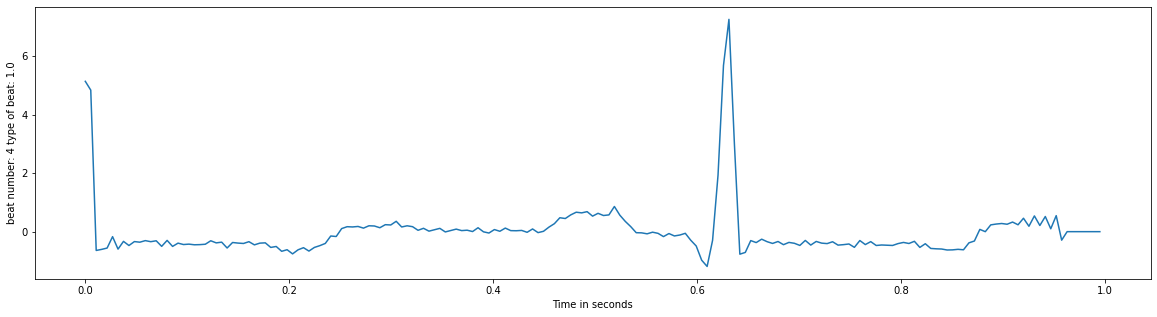

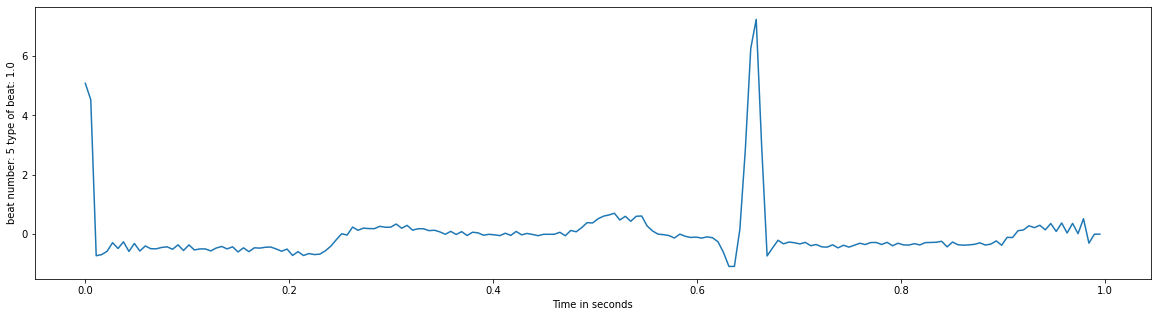

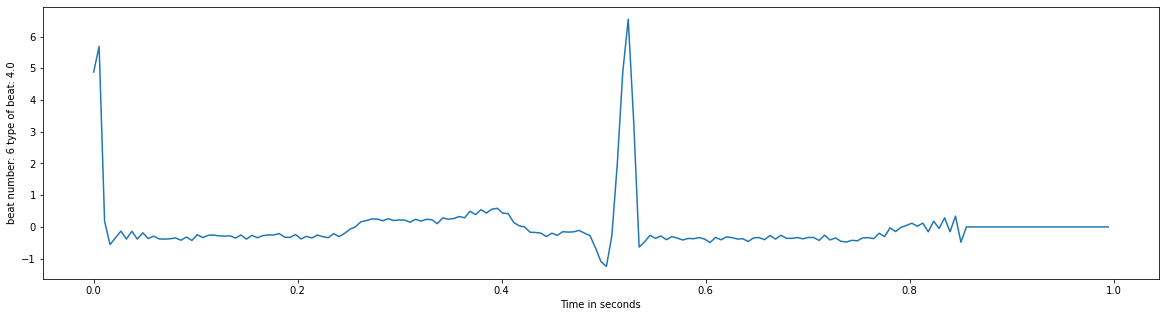

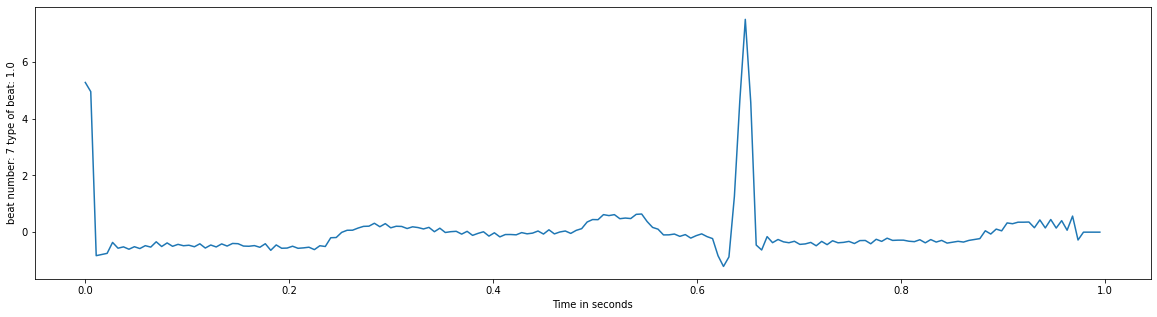

In [177]:
data = np.loadtxt('/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/data_ecg/100_MLII.csv', delimiter=',')
for beat_num in [0,1,2,3,4,5,6,7]:
    time_value = np.arange(187, dtype = 'float') / 187
    current_beat = data[beat_num][:-1]
    ann_num = data[beat_num][-1]
    plt.figure(figsize=(20,5))
    plt.plot(time_value, current_beat)
    plt.xlabel('Time in seconds')
    plt.ylabel('beat number: ' + str(beat_num) + ' type of beat: ' + str(ann_num))

In [178]:
print(all_beats.shape)

(96,)


In [180]:
print(data.shape)

normal = data[:,187] == 1.0

count = 0
for i in normal:
    if i:
        count+=1
print(count)

(1965, 188)
1932
